In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime
%matplotlib inline

In [3]:
# end = datetime.now()
# start = datetime(end.year, end.month, end.day)

start = datetime(2015, 1 , 1)
end = datetime(2020, 11, 27)

In [4]:
#Import Stocks Data from Yahoo Finance
AAPL = web.DataReader("AAPL", 'yahoo', start, end)
FB   = web.DataReader("FB",   'yahoo', start, end)
NVDA = web.DataReader("NVDA", 'yahoo', start, end)
MSFT = web.DataReader("MSFT", 'yahoo', start, end)
JNJ  = web.DataReader("JNJ",  'yahoo', start, end)
TSLA = web.DataReader("TSLA", 'yahoo', start, end)
 
# create new dataframe with just closing price for each stock
df = pd.DataFrame({'AAPL': AAPL['Adj Close'], 'FB': FB['Adj Close'],
                   'NVDA': NVDA['Adj Close'], 'MSFT': MSFT['Adj Close'],
                    'JNJ': JNJ['Adj Close'], 'TSLA':TSLA['Adj Close']})

df.tail()


,AAPL,FB,NVDA,MSFT,JNJ,TSLA
Date,,,,,,
2020-11-20,117.339996,269.700012,523.510010,210.389999,145.350006,489.609985
2020-11-23,113.849998,268.429993,525.599976,210.110001,143.869995,521.849976
2020-11-24,115.169998,276.920013,518.309998,213.860001,143.869995,555.380005
2020-11-25,116.029999,275.589996,529.390015,213.869995,143.679993,574.000000
2020-11-27,116.589996,277.809998,530.450012,215.229996,144.000000,585.760010


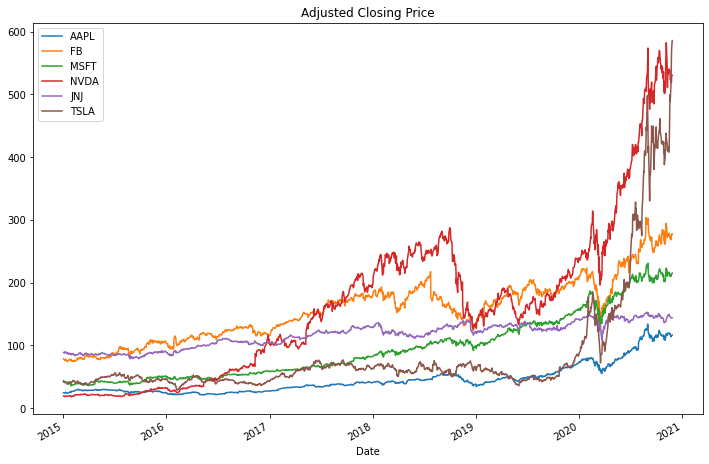

In [5]:
#plot stocks and their Adjusted Closing Price during start and end dates 
AAPL['Adj Close'].plot(label='AAPL',figsize=(12,8), title = 'Adjusted Closing Price')
FB['Adj Close'].plot(label='FB')
MSFT['Adj Close'].plot(label='MSFT')
NVDA['Adj Close'].plot(label='NVDA')
JNJ['Adj Close'].plot(label='JNJ')
TSLA['Adj Close'].plot(label = 'TSLA')
plt.legend()

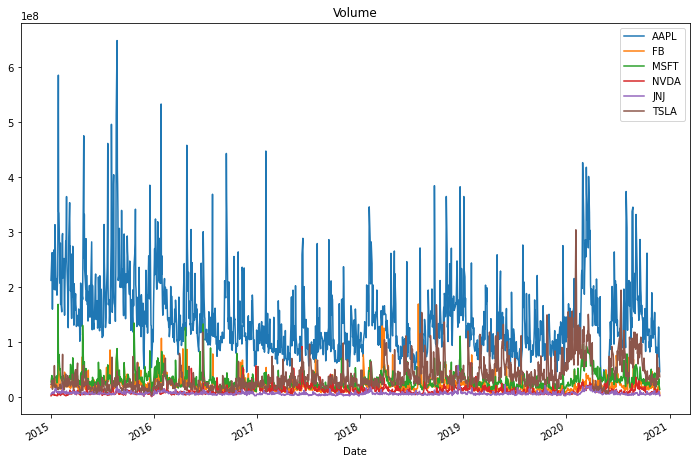

In [6]:
#plot stocks and their volume traded during start and end dates 
AAPL['Volume'].plot(label='AAPL',figsize=(12,8), title = 'Volume')
FB['Volume'].plot(label='FB')
MSFT['Volume'].plot(label='MSFT')
NVDA['Volume'].plot(label='NVDA')
JNJ['Volume'].plot(label='JNJ')
TSLA['Volume'].plot(label = 'TSLA')
plt.legend()

Text(0, 0.5, 'Return From Start Price')

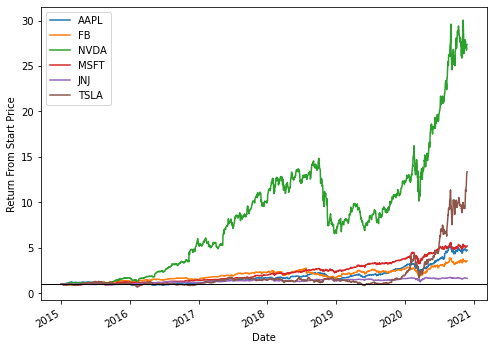

In [7]:
#normalise our stocks, by dividing all the closing price to the first closing price in the period
#so if you were to buy all these stocks at that start date, each stock increased nicely especially NVDA
startP = df.apply(lambda x: x / x[0])
startP.plot(figsize=(8,6)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price')

Text(0, 0.5, 'Daily Percentage Return')

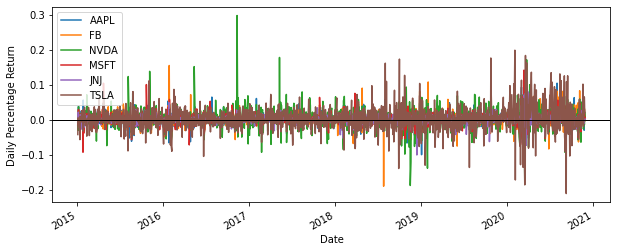

In [8]:
# plot daily percentage change of stock price.
df2=df.pct_change()
df2.plot(figsize=(10,4))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Daily Percentage Return')

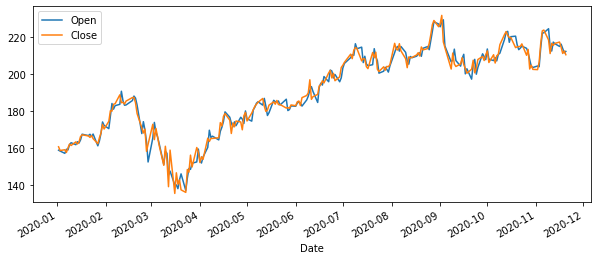

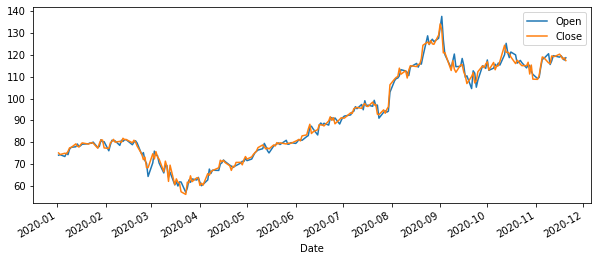

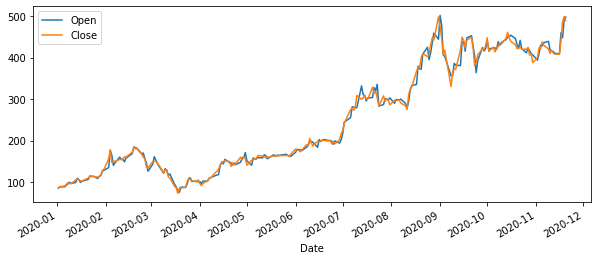

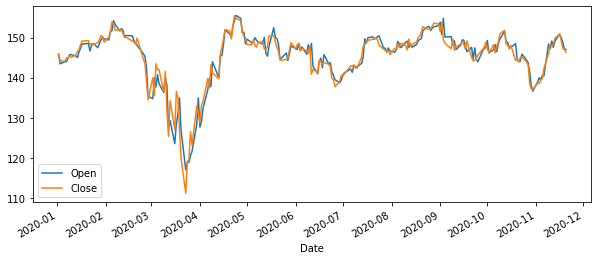

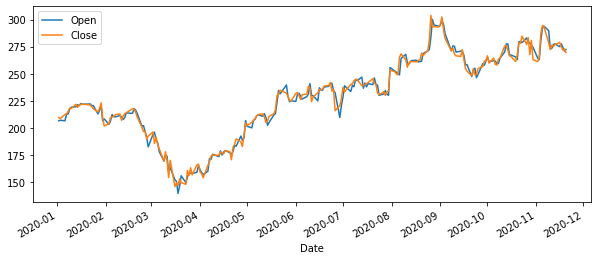

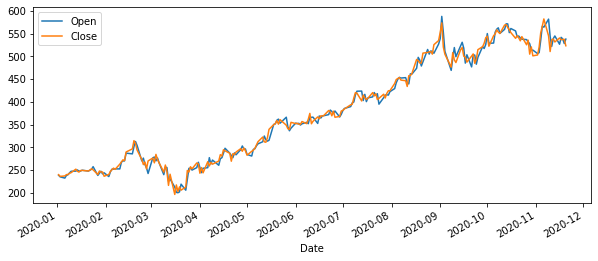

In [26]:
MSFT.loc['2020-01-01':'2020-11-20',['Open','Close']].plot(label='msft', figsize=(10,4));
AAPL.loc['2020-01-01':'2020-11-20',['Open','Close']].plot(figsize=(10,4));
TSLA.loc['2020-01-01':'2020-11-20',['Open','Close']].plot(figsize=(10,4));
JNJ.loc['2020-01-01':'2020-11-20',['Open','Close']].plot(figsize=(10,4));
FB.loc['2020-01-01':'2020-11-20',['Open','Close']].plot(figsize=(10,4));
NVDA.loc['2020-01-01':'2020-11-20',['Open','Close']].plot(figsize=(10,4));

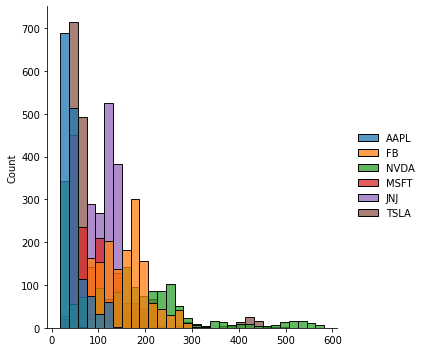

In [30]:
#histogram to show spread and distribution type
sns.displot(df.dropna(), bins=30, color="purple")